## **Short Summary of Results**

1. It is an imbalanced dataset

2. After extensive exploratory data analysis we have found the features that have the most correlation with the client's probability of opting for a term deposit. They are as follows▶

a. Previous - The number of days that passed by after the client was last contacted from a previous campaign, when the number of days is low, the most likely outcome is that they won't subscribe to a term deposit. Otherwise, they will subscribe to a term deposit. 

b. Educational background - Tertiary educated people has the highest chance of subscribing to a term deposit, then comes secondary educated people and lastly primary educated people has the lowest chance of subscribing to a term deposit

c. Marital status -  divorced people has the highest chance of subscribing to a term deposit, then comes single people and lastly married people has the lowest chance of subscribing to a term deposit.

d. Housing loan- yes or no - People who does not have a housing loan has the highest chance of subscribing to a term deposit.

e. Personal loan- yes or no - People who does not have a personal loan has the highest chance of subscribing to a term deposit.

3. We found a Logistic Regression model accuracy of 87%

4. The sensitivity (Sensitivity is calculated as the number of correct positive predictions divided by the total number of positives) is very low at approximately 0.20% as observed from the confusion matrix heatmap which can be improved by using bootstrap as discussed in assignment03.  From confusion matrix we found that the logistic regression model has 108 false negative. The ratio of true positive to false negative is 1:108. This ratio can be improved by using bootstrap to balance the response variable which will be discussed in assignment03. 

5. We found a Support Vector Machine accuracy of 88%

6. We found a Decision Tree Classifier accuracy of 88%

7. We found a Random Forest classifier accuracy of 87.7%

In [ ]:

import pandas as pd
df = pd.read_csv ('bank.csv', sep=';')
print (df)

# df.head()
# df.dtypes

0    age            job  marital  education  ... pdays previous poutcome   y
1     30     unemployed  married    primary  ...    -1        0  unknown  no
2     33       services  married  secondary  ...   339        4  failure  no
3     35     management   single   tertiary  ...   330        1  failure  no
4     30     management  married   tertiary  ...    -1        0  unknown  no
5     59    blue-collar  married  secondary  ...    -1        0  unknown  no
...   ..            ...      ...        ...  ...   ...      ...      ...  ..
4517  33       services  married  secondary  ...    -1        0  unknown  no
4518  57  self-employed  married   tertiary  ...    -1        0  unknown  no
4519  57     technician  married  secondary  ...    -1        0  unknown  no
4520  28    blue-collar  married  secondary  ...   211        3    other  no
4521  44   entrepreneur   single   tertiary  ...   249        7    other  no

[4521 rows x 17 columns]


***Exploratory Data Analysis for Logistic Regression for Binary Classification***

# **Univariate Analysis**

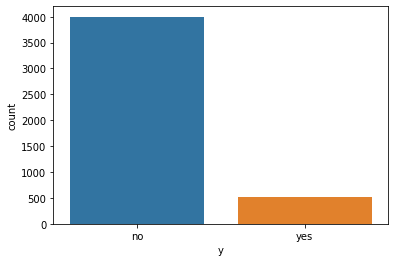

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
 
# read a tips.csv file from seaborn library

 
# count plot on single categorical variable
sns.countplot(x ='y', data = df)
 
# Show the plot
plt.show()


From above we can observe that most of the data is negative or negative chance of clients subscribing to a term deposit

# **Bivariate Analysis**

Fitting in simple logistic regression model to determine the predictor variables

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Optimization terminated successfully.
         Current function value: 0.356339
         Iterations 6


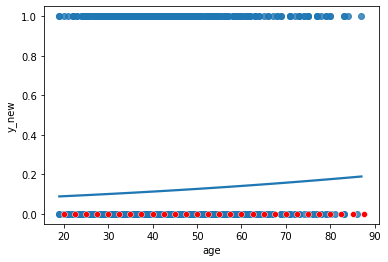

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


df['y_new'] = pd.factorize(df.y)[0]

df['y_new'] = df.y_new.astype(float)


df["age"] = pd.to_numeric(df["age"])
df['age'] = df.age.astype(float)

import statsmodels.formula.api
from statsmodels.formula.api import logit
mdl_recency1 = logit("y_new ~ age", data = df).fit() 
explanatory_data1 = pd.DataFrame({"age": np.arange(20, 90, 2.5)}) 
prediction_data1 = explanatory_data1.assign(y_new = mdl_recency1.predict(explanatory_data1)) 
 
prediction_data1["most_likely_outcome"] = np.round(prediction_data1["y_new"]) 
sns.regplot(x="age",y="y_new", data=df, ci=None, logistic=True)

sns.scatterplot(x="age", y="most_likely_outcome",data=prediction_data1,color="red")
plt.show() 

1. Getting the most likely outcome
One simpler prediction I can make, rather than calculating probabilities of a response, is to calculate the most likely response. That is, if the probability of subscribing to a term deposit is less than 0-point-5, the most likely outcome is that they won't subscribe to a term deposit. If their probability is greater then 0-point-5, it's more likely that they will subscribe to a term deposi. To calculate this, I simply round the predicted probabilities using numpy's round() function.

2. Visualizing most likely outcome
I plotted the most likely outcome by using the prediction data with the numbers I just calculated. For the variation in age, the most likely outcome is that they won't subscribe to a term deposit. so I will drop this variable from our predictor variables.

Optimization terminated successfully.
         Current function value: 0.352780
         Iterations 6


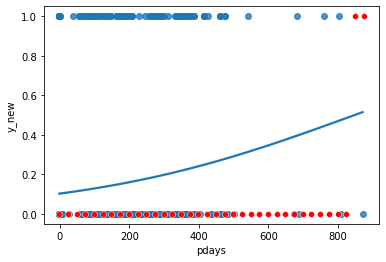

In [ ]:
df["pdays"] = pd.to_numeric(df["pdays"])
df['pdays'] = df.pdays.astype(float)

df['y_new'] = pd.factorize(df.y)[0]
df['y_new'] = df.y_new.astype(float)

import statsmodels.formula.api
from statsmodels.formula.api import logit
mdl_recency = logit("y_new ~ pdays", data = df).fit() 
explanatory_data = pd.DataFrame({"pdays": np.arange(-1, 890, 25)}) 
prediction_data = explanatory_data.assign(y_new = mdl_recency.predict(explanatory_data)) 

 
prediction_data["most_likely_outcome_pdays"] = np.round(prediction_data["y_new"]) 
sns.regplot(x="pdays",y="y_new", data=df, ci=None, logistic=True)

sns.scatterplot(x="pdays", y="most_likely_outcome_pdays",data=prediction_data,color="red")
plt.show() 


From the above graph, for the variation in number of days that passed by after the client was last contacted from a previous campaign, the most likely outcome is that they won't subscribe to a term deposit. so I will drop this variable from our predictor variables.

Optimization terminated successfully.
         Current function value: 0.352410
         Iterations 6


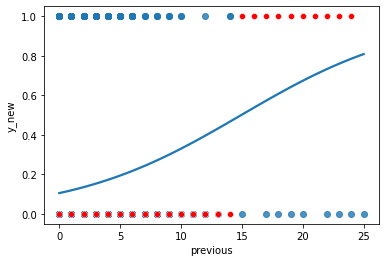

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df["previous"] = pd.to_numeric(df["previous"])
df['previous'] = df.previous.astype(float)
df['y_new'] = pd.factorize(df.y)[0]

df['y_new'] = df.y_new.astype(float)

# # print(df)
# # df.dtypes
import statsmodels.formula.api
from statsmodels.formula.api import logit
mdl_recency_previous = logit("y_new ~ previous", data = df).fit() 
explanatory_data_previous = pd.DataFrame({"previous": np.arange(0, 25, 1)}) 
prediction_data_previous = explanatory_data_previous.assign(y_new = mdl_recency_previous.predict(explanatory_data_previous)) 
prediction_data_previous["most_likely_outcome_previous"] = np.round(prediction_data_previous["y_new"]) 
sns.regplot(x="previous",y="y_new", data=df, ci=None, logistic=True)

sns.scatterplot(x="previous", y="most_likely_outcome_previous",data=prediction_data_previous,color="red")
plt.show() 


From the above graph, for the number of days that passed by after the client was last contacted from a previous campaign, when the number of days is low, the most likely outcome is that they won't subscribe to a term deposit. Otherwise, they will subscribe to a term deposit. So this is eligible to be a predictor variable.

Optimization terminated successfully.
         Current function value: 0.357186
         Iterations 6


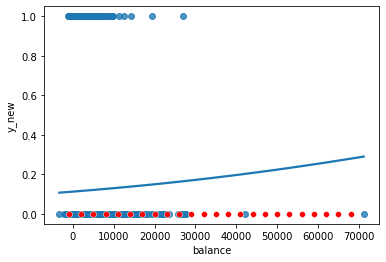

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df["balance"] = pd.to_numeric(df["balance"])
df['balance'] = df.balance.astype(float)
df['y_new'] = pd.factorize(df.y)[0]

df['y_new'] = df.y_new.astype(float)


import statsmodels.formula.api
from statsmodels.formula.api import logit
mdl_recency_balance = logit("y_new ~ balance", data = df).fit() 
explanatory_data_balance = pd.DataFrame({"balance": np.arange(-1000, 70000, 3000)}) 
prediction_data_balance = explanatory_data_balance.assign(y_new = mdl_recency_balance.predict(explanatory_data_balance)) 
prediction_data_balance["most_likely_outcome_balance"] = np.round(prediction_data_balance["y_new"]) 
sns.regplot(x="balance",y="y_new", data=df, ci=None, logistic=True)

sns.scatterplot(x="balance", y="most_likely_outcome_balance",data=prediction_data_balance,color="red")
plt.show()

From the above graph, for the variation in account balance of the client, the most likely outcome is that they won't subscribe to a term deposit. so I will drop this variable from our predictor variables.

Optimization terminated successfully.
         Current function value: 0.354841
         Iterations 7


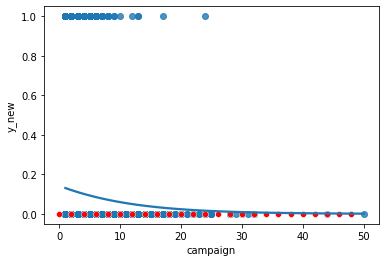

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df["campaign"] = pd.to_numeric(df["campaign"])
df['campaign'] = df.campaign.astype(float)
df['y_new'] = pd.factorize(df.y)[0]

df['y_new'] = df.y_new.astype(float)


import statsmodels.formula.api
from statsmodels.formula.api import logit
mdl_recency_campaign = logit("y_new ~ campaign", data = df).fit() 
explanatory_data_campaign = pd.DataFrame({"campaign": np.arange(0, 50, 2)}) 
prediction_data_campaign = explanatory_data_campaign.assign(y_new = mdl_recency_campaign.predict(explanatory_data_campaign)) 
prediction_data_campaign["most_likely_outcome_campaign"] = np.round(prediction_data_campaign["y_new"]) 
sns.regplot(x="campaign",y="y_new", data=df, ci=None, logistic=True)

sns.scatterplot(x="campaign", y="most_likely_outcome_campaign",data=prediction_data_campaign,color="red")
plt.show()

From the above graph, for the variation in the number of contacts performed during this campaign and for this client,the most likely outcome is that they won't subscribe to a term deposit. so I will drop this variable from our predictor variables.

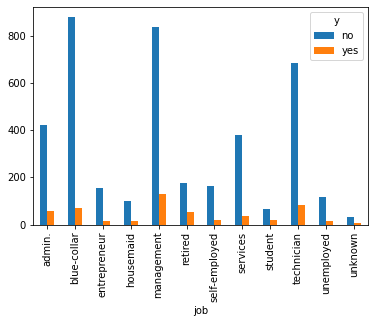

In [ ]:
pd.crosstab(df.job,df.y).plot(kind='bar')

From above chart there seem to be some impact of job on subscribing a term deposit but it is not major hence we will ignore job in our analysis

y           no  yes
marital            
divorced   451   77
married   2520  277
single    1029  167


(19.03005634409817,
 7.373535401823763e-05,
 2,
 array([[ 467.15328467,   60.84671533],
        [2474.67374475,  322.32625525],
        [1058.17297058,  137.82702942]]))

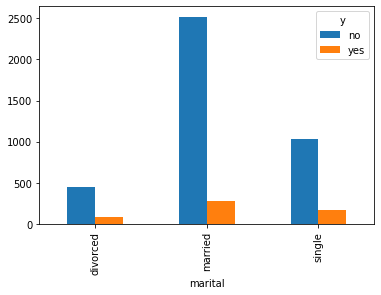

In [ ]:
pd.crosstab(df.marital,df.y).plot(kind='bar')
myField1_marital = df['marital']
myField2_marital = df['y']
myCrosstable_marital = pd.crosstab(myField1_marital, myField2_marital)
print(myCrosstable_marital)
import scipy.stats
from scipy.stats import chi2_contingency
chiVal_marital, pVal_marital, df_marital, exp_marital = chi2_contingency(myCrosstable_marital)
chiVal_marital, pVal_marital, df_marital, exp_marital

From the above output, the first value is the **chi-square** value of 19.03005634409817. The chance of such a value or even more extreme, in a sample, if there is no association in the population is 7.37e-5 (the second value). This is known as the p-value or significance. It is considered 'significant' usually if this value is below 0.05, which in this case it is. This indicates then an association between the two variables (one has an impact on the other).

The third value is the degrees of freedom, which is an indication of the size of the table, since it is simply the number of rows - 1, times the number of columns - 1.

The last array are the so called expected values. These are the counts to be expected if the two variables had no influence on each other.

So my observation from the graph and the chi-square test is that divorced people has the highest chance of subscribing to a term deposit, then comes single people and lastly married people has the lowest chance of subscribing to a term deposit, as the p-value is much lower than 0.05 we will consider this variable as our predictor variable.

y            no  yes
education           
primary     614   64
secondary  2061  245
tertiary   1157  193
unknown     168   19


(15.236579554873757,
 0.001625240003630989,
 3,
 array([[ 599.867286  ,   78.132714  ],
        [2040.2565804 ,  265.7434196 ],
        [1194.42601194,  155.57398806],
        [ 165.45012165,   21.54987835]]))

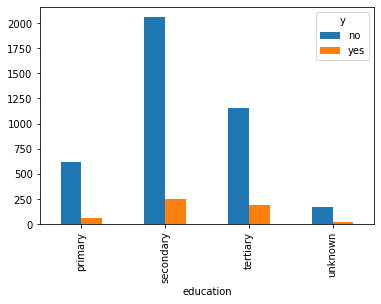

In [ ]:
pd.crosstab(df.education,df.y).plot(kind='bar')
myField1_education = df['education']
myField2_education = df['y']
myCrosstable_education = pd.crosstab(myField1_education, myField2_education)
print(myCrosstable_education)
import scipy.stats
from scipy.stats import chi2_contingency
chiVal_education, pVal_education, df_education, exp_education = chi2_contingency(myCrosstable_education)
chiVal_education, pVal_education, df_education, exp_education

So my observation from the graph and the **chi-square test** is that tertiary educated people has the highest chance of subscribing to a term deposit, then comes secondary educated people and lastly primary educated people has the lowest chance of subscribing to a term deposit, as the p-value is much lower than 0.05 we will consider this variable as our predictor variable.

y       no  yes
loan           
no    3352  478
yes    648   43


(21.87182161746215,
 2.9148288298428256e-06,
 1,
 array([[3388.63083389,  441.36916611],
        [ 611.36916611,   79.63083389]]))

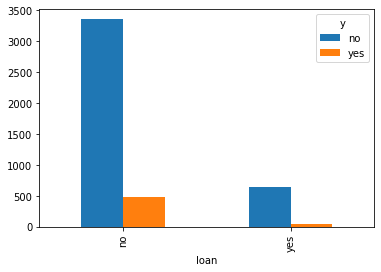

In [ ]:
pd.crosstab(df.loan,df.y).plot(kind='bar')
myField1 = df['loan']
myField2 = df['y']
myCrosstable = pd.crosstab(myField1, myField2)
print(myCrosstable)
import scipy.stats
from scipy.stats import chi2_contingency
chiVal_loan, pVal_loan, df_loan, exp_loan = chi2_contingency(myCrosstable)
chiVal_loan, pVal_loan, df_loan, exp_loan

So my observation from the graph and the **chi-square test** is that people who does not have a personal loan has the highest chance of subscribing to a term deposit and also as the p-value is much lower than 0.05 we will consider this variable as our predictor variable.

(0.008753166978396806,
 0.9254599873026758,
 1,
 array([[3932.75823933,  512.24176067],
        [  67.24176067,    8.75823933]]))

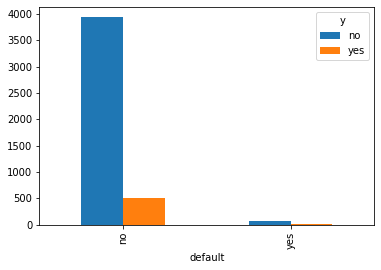

In [ ]:
pd.crosstab(df.default,df.y).plot(kind='bar')
myField1_default = df['default']
myField2_default = df['y']
myCrosstable_default = pd.crosstab(myField1_default, myField2_default)
import scipy.stats
from scipy.stats import chi2_contingency
chiVal_default, pVal_default, df_default, exp_default = chi2_contingency(myCrosstable_default)
chiVal_default, pVal_default, df_default, exp_default

So my observation from the graph and the **chi-square test** is the p-value is much higher than 0.05 we will not consider this variable as our predictor variable.

y          no  yes
housing           
no       1661  301
yes      2339  220


(48.88462833144263,
 2.7146998959323014e-12,
 1,
 array([[1735.89913736,  226.10086264],
        [2264.10086264,  294.89913736]]))

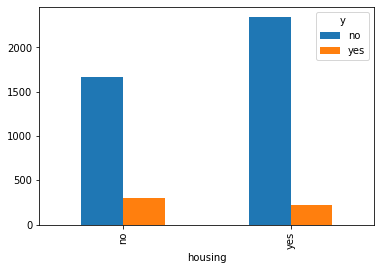

In [ ]:
pd.crosstab(df.housing,df.y).plot(kind='bar')
myField1_housing = df['housing']
myField2_housing = df['y']
myCrosstable_housing = pd.crosstab(myField1_housing, myField2_housing)
print(myCrosstable_housing)
import scipy.stats
from scipy.stats import chi2_contingency
chiVal_housing, pVal_housing, df_housing, exp_housing = chi2_contingency(myCrosstable_housing)
chiVal_housing, pVal_housing, df_housing, exp_housing

So my observation from the graph and the chi-square test is that people who does not have a housing loan has the highest chance of subscribing to a term deposit and also as the p-value is much lower than 0.05 we will consider this variable as our predictor variable.

In [ ]:
# Making the predictor dataframe by dropping other variables, I did not consider contact, day, month, poutcome as they did not seem important from the get go. 
# Also the problem states to not take duration as predictor as it states- "this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model"
# dropping rows for unknown values in education column
df_predict = df.drop(df.index[df['education'] == 'unknown'])
df_predict1=df_predict.drop(columns=['contact', 'day', 'month', 'duration', 'pdays', 'default', 'balance', 'pdays','age','job','campaign', 'poutcome', 'y', 'y_new'])

print(df_predict)
print(df_predict1)

df_predict.to_csv(r'As2_train_test_data.csv', index = False)

0      age            job  marital  education  ... previous  poutcome   y y_new
1     30.0     unemployed  married    primary  ...      0.0   unknown  no   0.0
2     33.0       services  married  secondary  ...      4.0   failure  no   0.0
3     35.0     management   single   tertiary  ...      1.0   failure  no   0.0
4     30.0     management  married   tertiary  ...      0.0   unknown  no   0.0
5     59.0    blue-collar  married  secondary  ...      0.0   unknown  no   0.0
...    ...            ...      ...        ...  ...      ...       ...  ..   ...
4517  33.0       services  married  secondary  ...      0.0   unknown  no   0.0
4518  57.0  self-employed  married   tertiary  ...      0.0   unknown  no   0.0
4519  57.0     technician  married  secondary  ...      0.0   unknown  no   0.0
4520  28.0    blue-collar  married  secondary  ...      3.0     other  no   0.0
4521  44.0   entrepreneur   single   tertiary  ...      7.0     other  no   0.0

[4334 rows x 18 columns]
0     marital 

**Predictor Dataframe**

In [ ]:
# putting dummy variables in categorical columns
education_dummies = pd.get_dummies(df_predict1.education, prefix="education")
df_with_dummies = pd.concat([df_predict1,education_dummies],axis='columns')
df_with_dummies.drop('education',axis='columns',inplace=True)
marital_dummies = pd.get_dummies(df_with_dummies.marital, prefix="marital")
df_with_dummies1 = pd.concat([df_with_dummies,marital_dummies],axis='columns')
df_with_dummies1.drop('marital',axis='columns',inplace=True)
housing_dummies = pd.get_dummies(df_with_dummies1.housing, prefix="housing")
df_with_dummies2 = pd.concat([df_with_dummies1,housing_dummies],axis='columns')
df_with_dummies2.drop('housing',axis='columns',inplace=True)
loan_dummies = pd.get_dummies(df_with_dummies2.loan, prefix="loan")
df_with_dummies3 = pd.concat([df_with_dummies2,loan_dummies],axis='columns')
df_with_dummies3.drop('loan',axis='columns',inplace=True)
df_with_dummies3.head()
# df_with_dummies3.dtypes

,previous,education_primary,education_secondary,education_tertiary,marital_divorced,marital_married,marital_single,housing_no,housing_yes,loan_no,loan_yes
1,0.0,1,0,0,0,1,0,1,0,1,0
2,4.0,0,1,0,0,1,0,0,1,0,1
3,1.0,0,0,1,0,0,1,0,1,1,0
4,0.0,0,0,1,0,1,0,0,1,0,1
5,0.0,0,1,0,0,1,0,0,1,1,0


In [ ]:
# Make whole dataframe float type
df_with_dummies3 = df_with_dummies3.astype(float)
df_with_dummies3.dtypes

previous               float64
education_primary      float64
education_secondary    float64
education_tertiary     float64
marital_divorced       float64
marital_married        float64
marital_single         float64
housing_no             float64
housing_yes            float64
loan_no                float64
loan_yes               float64
dtype: object

In [ ]:
X = df_with_dummies3
X.head()

,previous,education_primary,education_secondary,education_tertiary,marital_divorced,marital_married,marital_single,housing_no,housing_yes,loan_no,loan_yes
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,4.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
5,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [ ]:
y1 = df_predict.y_new

## **1. Using Logistic Regression Classifier**

In [ ]:
import sklearn.model_selection
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y1,train_size=0.8)

Above I have taken train size as 0.8 so I have take 80% data for training and 20% data for test

In [ ]:
import sklearn.linear_model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
model.predict(X_test)


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
y_predicted = model.predict(X_test)

Here, it shows the predictions for our test dataset

In [ ]:
model.score(X_test,y_test)

0.8742791234140715

Here we got 87% of accuracy


# **Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[757,   1],
       [108,   1]])

Text(69.0, 0.5, 'Truth')

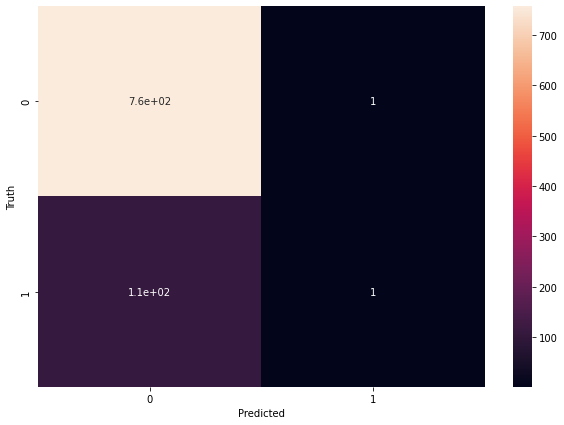

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

From the confusion matrix heatmap, there are 1 false-positive and 108 false-negative predictions. The ratio of true positive to false negative is 1:108. This ratio can be improved by using bootstrap to balance the response variable which will be discussed in assignment03.

## **2. Using Support Vector Machine Classifier**

In [ ]:
from sklearn.svm import SVC
# the gamma parameter defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’.
# when gamma=auto that represents gamma's default value which is '1/number_of_features'
svm = SVC(gamma='auto')
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.881199538638985

Above the accuracy of the SVM model is shown. SVM uses a technique called the kernel trick to transform data and then based on these transformations it finds an optimal boundary between the possible outputs. So, it does some extremely complex data transformations, then figures out how to seperate the data based on the labels or outputs I've defined [1].